<a href="https://colab.research.google.com/github/md-abu-shayid/Brain_Tumor_Detection_CNN/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import SGD, Adam
from keras.optimizers.sgd import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical

# Import Dataset

In [2]:
from zipfile import ZipFile
file_name = "/content/sample_data/Brain_Tumor_Dataset.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Successfully extractall the .zip file")

Successfully extractall the .zip file


In [3]:
import os

path = "/content/Brain_Tumor_Dataset/"
files = os.listdir(path)[0:3]
print(files)

['Testing', 'Training', '.DS_Store']


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

Sequential is a fundamental class in Keras (now part of TensorFlow) used for building linear stack models of neural networks. It allows you to create a neural network by adding layers one by one in a sequential manner. Each layer is connected to the next one, forming a feedforward neural network.

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

### ipywidgets:
This library provides interactive widgets for the Jupyter Notebook and JupyterLab environments. It allows you to create GUI elements like sliders, buttons, text boxes, etc., to make your notebooks more interactive and user-friendly.
​
### io:
This module provides Python's core tools for working with I/O (input/output). It allows you to read and write data from different sources, such as files, network connections, and in-memory streams.
​
### PIL (Python Imaging Library):
PIL is a popular Python library for working with images. However, since Python 3.1, PIL has been replaced by its fork called "Pillow," which provides additional features and ongoing support. It's used here for image processing.
​
### tqdm:
This is a progress bar library that provides a visual representation of the progress of a loop or an operation, making it easier to track the completion status.
​
### train_test_split:
This function is part of the sklearn.model_selection module in scikit-learn, a popular machine learning library. It is used to split a dataset into training and testing sets, allowing you to evaluate the performance of a machine learning model.
​
### cv2:
OpenCV is a computer vision library used for various image and video processing tasks. In this case, cv2 is likely referring to the OpenCV Python module.
​
### shuffle:
This function is part of the sklearn.utils module in scikit-learn. It is used to randomly shuffle the data in arrays or datasets to avoid any bias during model training.
​
### tensorflow (imported as tf):
TensorFlow is a popular deep learning library developed by Google. It provides a flexible and efficient framework for building and training neural networks.

# Read the Dataset

X_train and Y_train are initialized as empty lists to store the images and labels,and image_size is set to 150, which means the images will be resized to 150x150 pixels.

Labels is a list containing the names of the four classes: 'glioma_tumor', 'meningioma_tumor', 'no_tumor', and 'pituitary_tumor'.

The first loop iterates over the labels list and processes the images in the Training directory for each label. For each image in a particular class folder.It also reads the image using cv2.imread(), resizes it to the specified image_size, and then appends the image to X_train and the corresponding label (class name) to Y_train.

The second loop performs a similar operation for the images in the Testing directory. The images from the testing set are added to the X_train and their corresponding labels to Y_train.

After loading and processing all the images, X_train and Y_train are converted to NumPy arrays using np.array().

In [7]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Brain_Tumor_Dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Brain_Tumor_Dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In above code we are saving all input image from training and testing folder into x and y train only to remove some kind of bias in the image. we will be creating train test split by suffling images.

In [8]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

The shuffle function ensures that the order of images and labels is randomized, which helps in avoiding any potential biases during model training. we are suffling x train and y train together to ensure that the images and their corresponding labels remain aligned after the randomization. we should choose randome state value as high as possible to ensure good number of suffling

In shape(3264, 150, 150, 3) The first element 3264, indicates that you have 3264 images in the training set. The second and third elements, 150 and 150, denote the height and width of each image, respectively. The last element, 3, represents the number of color channels in the image (assuming the images are RGB images; it would be 1 for grayscale images).

# Train and Test Split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

we are taking test size of 10 percent only as our sample size of image is low, random state wil ensure that train test split is not bias towards one kind of feature

In training x train values are images converted to array while y train values are labels like types of cancer

In code below we will be converting the labels index (formed in the above code) into the categorical variables for both y train and y test

In [10]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

The first loop iterates over each element in y_train, which contains the class names (e.g., 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor').

Inside the loop, the index of each class name in the labels list is obtained using the index method. This index represents the numerical representation of the class. For example, if 'meningioma_tumor' has an index of 1 in the labels list, then the corresponding element in y_train_new will be 1. After processing all elements in y_train, the variable y_train_new now contains the numerical representations of the class labels.

tf.keras.utils.to_categorical function is used to convert these numerical representations into one-hot encoded vectors. This function takes the numerical labels (e.g., [0, 1, 2, 3]) and converts them into binary vectors. For example, if the numerical label is 1, the corresponding one-hot encoded vector would be [0, 1, 0, 0], where the 1 is placed at the index corresponding to the class 'meningioma_tumor'.

# Creating the CNN Model
MaxPooling2D layer with a pool size of 2x2, which reduces the spatial dimensions of the output.

Dropout layer is added with a rate of 0.3 (30 percent), which helps in preventing overfitting during training.

Flatten layer is added to flatten the 3D feature maps into a 1D vector to prepare for the fully connected layers.

Dense layers serve as the fully connected part of the neural network.

In the last dense layer we have used 4 layers because we have four feature

The softmax activation function is commonly used for multi-class classification problems, as it converts the model's raw output into probability scores for each class.

In [11]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

'add' function is used to adding a layer

the above model is inspired from vgg neural network that uses 16 layer of convulation layer

Conv2D(32,(3,3)- first layer is a Conv2D layer with 32 filters of size 3x3

Here are some guidelines to help you make these decisions:

Number of Filters (Depth): The number of filters determines the depth of your CNN architecture. More filters allow the network to learn more complex and higher-level features. In the early layers, you typically start with a smaller number of filters (e.g., 32 or 64) and gradually increase it in deeper layers (e.g., 128, 256, etc.). Very deep architectures may require more computational resources and may be prone to overfitting if not handled properly. A good practice is to start with a relatively shallow architecture and gradually increase the depth while monitoring the model's performance.

Filter Size: The filter size (also called kernel size) determines the receptive field of each convolutional operation. Smaller filter sizes focus on capturing local patterns, while larger filter sizes capture more global patterns. Common filter sizes are 3x3 and 5x5. A 3x3 filter is widely used due to its simplicity and computational efficiency. Smaller filter sizes help in learning fine-grained features, and larger filter sizes help in capturing more context and larger patterns. If you have limited computational resources, using smaller filter sizes may be preferable.

# Summary of the Model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

loss parameter specifies the loss function to be minimized during training. categorical_crossentropy' is used, which is a common loss function for multi-class classification problems with one-hot encoded class labels. It measures the dissimilarity between the predicted probability distribution and the true one-hot encoded labels.

optimizer='Adam': The optimizer parameter determines the optimization algorithm used to update the model's weights during training. 'Adam' is a popular optimization algorithm that combines the benefits of the AdaGrad and RMSprop algorithms. It adapts the learning rates for each parameter during training, making it well-suited for a wide range of deep learning tasks.

metrics=['accuracy']: The metrics parameter specifies the evaluation metrics to monitor during training and testing. In this case, ['accuracy'] is used, which means that the model's accuracy (the proportion of correctly classified samples) will be tracked during training.

After compiling the model, you can proceed to train it using the fit() method and the training data

In [14]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 26s 123ms/step - loss: 2.0074 - accuracy: 0.3061 - val_loss: 1.2924 - val_accuracy: 0.4456
Epoch 2/20
83/83 [==============================] - 8s 95ms/step - loss: 1.2557 - accuracy: 0.4177 - val_loss: 1.2399 - val_accuracy: 0.4694
Epoch 3/20
83/83 [==============================] - 8s 96ms/step - loss: 1.1029 - accuracy: 0.5214 - val_loss: 1.1254 - val_accuracy: 0.5000
Epoch 4/20
83/83 [==============================] - 8s 96ms/step - loss: 0.9114 - accuracy: 0.6061 - val_loss: 1.0217 - val_accuracy: 0.5544
Epoch 5/20
83/83 [==============================] - 8s 96ms/step - loss: 0.7648 - accuracy: 0.6863 - val_loss: 0.8036 - val_accuracy: 0.6633
Epoch 6/20
83/83 [==============================] - 8s 94ms/step - loss: 0.6568 - accuracy: 0.7473 - val_loss: 0.6485 - val_accuracy: 0.7449
Epoch 7/20
83/83 [==============================] - 8s 97ms/step - loss: 0.5661 - accuracy: 0.7821 - val_loss: 0.7411 - val_accuracy: 0.7041
Epoch 8/20


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

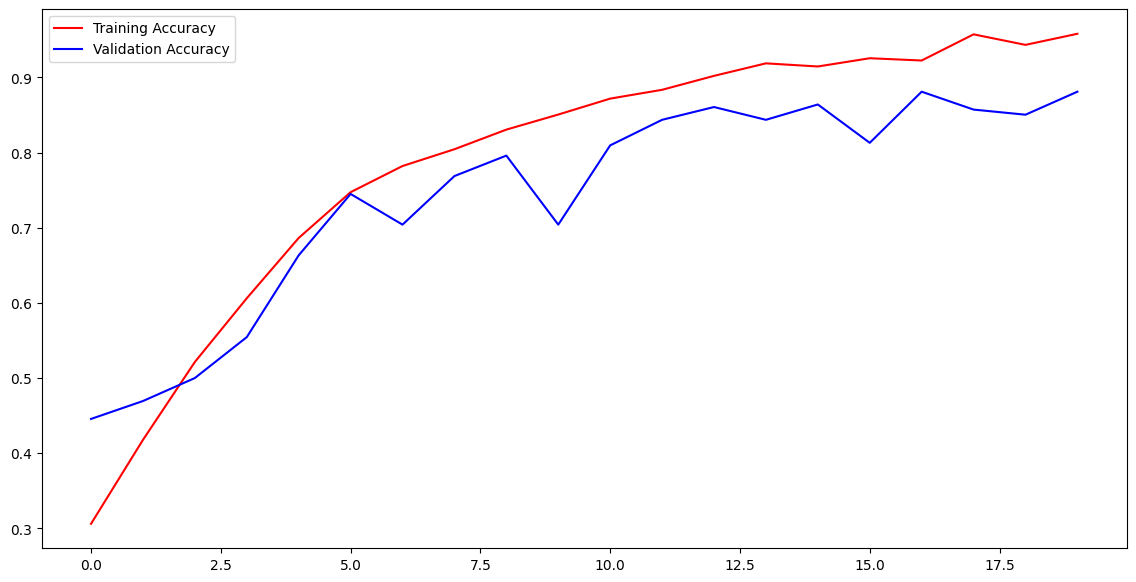

In [33]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

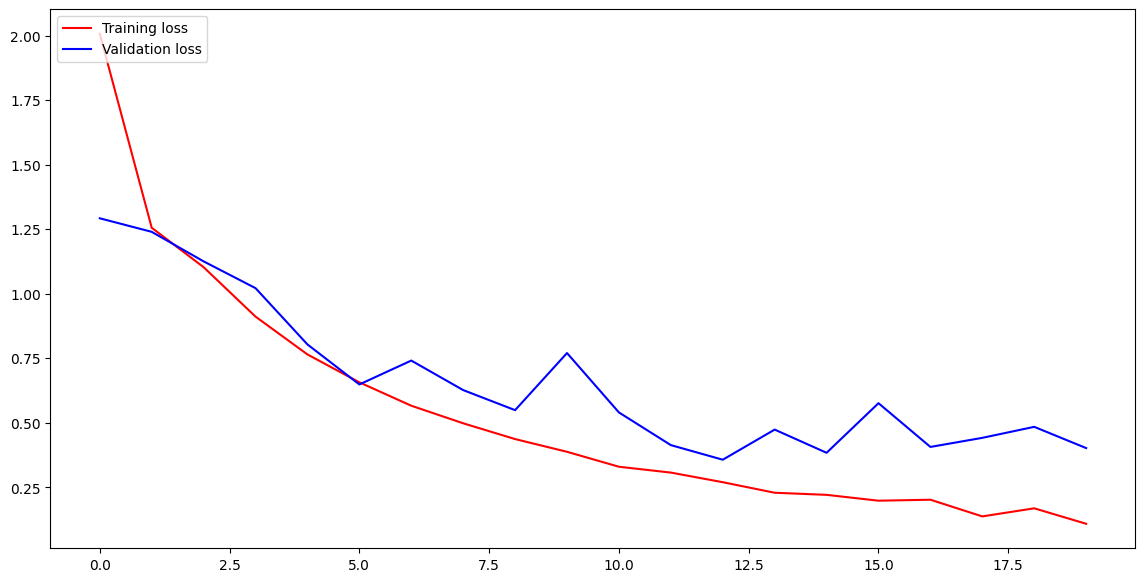

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [35]:
img = cv2.imread('/content/Brain_Tumor_Dataset/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [36]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

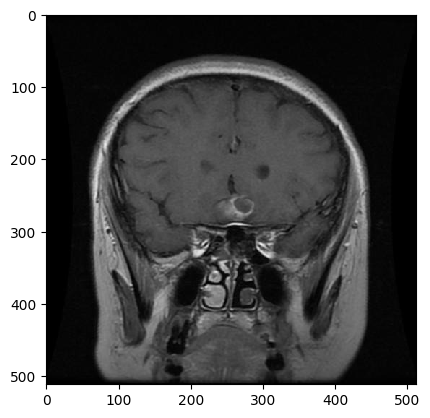

In [45]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Brain_Tumor_Dataset/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [46]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 19ms/step


3